### Multivariable functions, partial derivatives and plots

In [2]:
%run core.ipynb

In [44]:
def plot_mapping(f, a=-1.0, b=1.0, s=0.05, size=(9, 7), filepath=None):
    X, Y = meshgrid(np.arange(a, b, s), np.arange(a, b, s))
    Z = f(X, Y)
    fig = plot.figure()
    fig.set_size_inches(*size)
    ax = fig.gca(projection='3d')
    ax.plot_surface(X,
                    Y,
                    Z,
                    cstride=1,
                    rstride=1,
                    linewidth=0,
                    antialiased=False)
    plot.show()
    if filepath is not None:
        fig.savefig(filepath, dpi=fig.dpi)

In [38]:
def f(x, y):
    return x * y * (x**2 - y**2) / (x**2 + y**2)


u = f(x, y)

#### Multivariable mapping

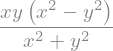

In [5]:
f(x, y)

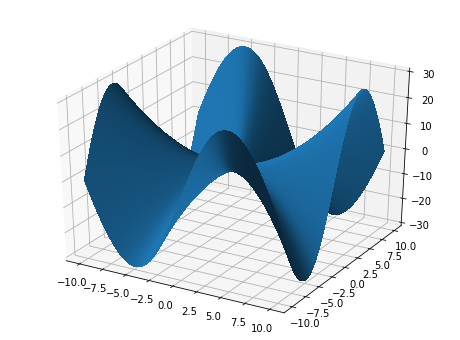

In [4]:
a, b, s = -10.0001, 10.0, 0.1  # ommitting the origin (0, 0)
plot_mapping(f, a=a, b=b, s=s)

#### Partial derivatives

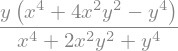

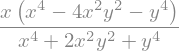

In [5]:
simplify(u.diff(x))
simplify(u.diff(y))

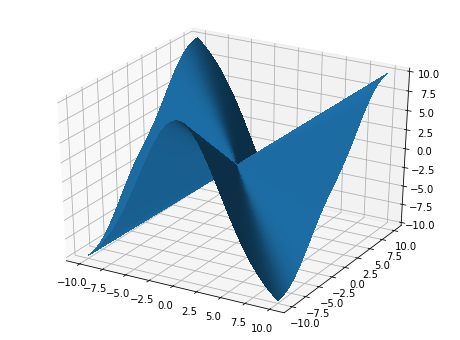

In [6]:
plot_mapping(lambdify((x, y), u.diff(x), modules='numpy'), a=a, b=b, s=s)

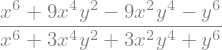

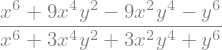

In [7]:
simplify(u.diff(x).diff(y))
simplify(u.diff(y).diff(x))

#### Mixed partial derivatives

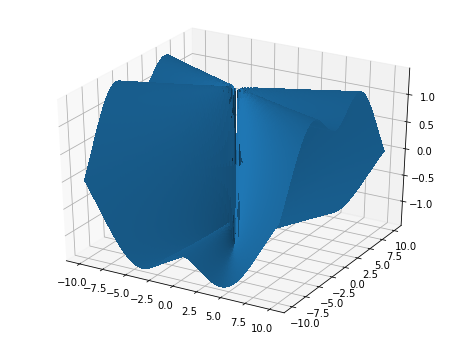

In [8]:
plot_mapping(lambdify((x, y), u.diff(y).diff(x), modules='numpy'),
             a=a,
             b=b,
             s=s)

### Example

In [47]:
def f(x, y):
    return x * y ** 3 / (x ** 2 + y ** 2)

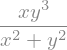

In [48]:
f(x, y)

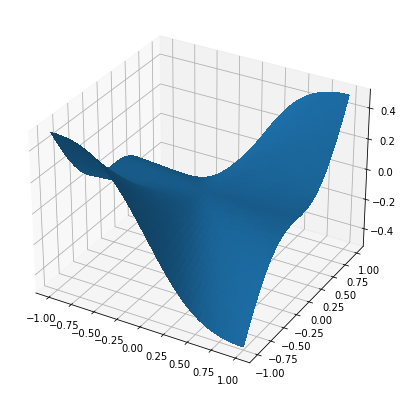

In [50]:
a, b, s = -1.0001, 1.0, 0.05
filepath = f'plots/non_interchangeable_partial_derivatives.png'
plot_mapping(f, a=a, b=b, s=s, filepath=filepath)

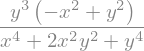

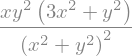

In [51]:
simplify(f(x, y).diff(x))
simplify(f(x, y).diff(y))

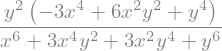

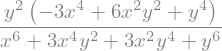

In [54]:
simplify(f(x, y).diff(x).diff(y))
simplify(f(x, y).diff(y).diff(x))

In [58]:
print(latex(simplify(f(x, y).diff(x).diff(y))))
print(latex(simplify(f(x, y).diff(y).diff(x))))

\frac{y^{2} \left(- 3 x^{4} + 6 x^{2} y^{2} + y^{4}\right)}{x^{6} + 3 x^{4} y^{2} + 3 x^{2} y^{4} + y^{6}}
\frac{y^{2} \left(- 3 x^{4} + 6 x^{2} y^{2} + y^{4}\right)}{x^{6} + 3 x^{4} y^{2} + 3 x^{2} y^{4} + y^{6}}


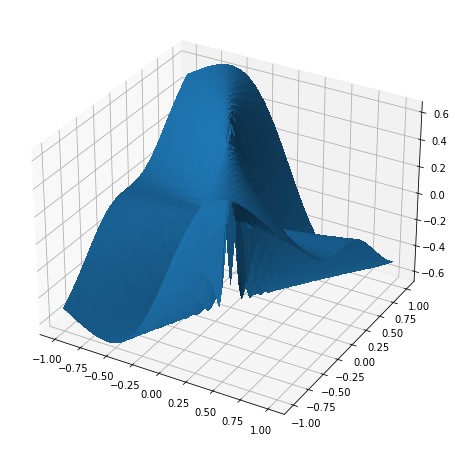

In [35]:
plot_mapping(lambdify((x, y), f(x, y).diff(x), modules='numpy'), a=a, b=b, s=s)

In [40]:
def f(x, y):
    return y ** 3 / (x ** 2 + y ** 2)

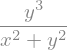

In [41]:
f(x, y)

In [55]:
latex(f(x,y))

'\\frac{x y^{3}}{x^{2} + y^{2}}'

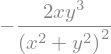

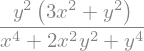

In [42]:
simplify(f(x, y).diff(x))
simplify(f(x, y).diff(y))

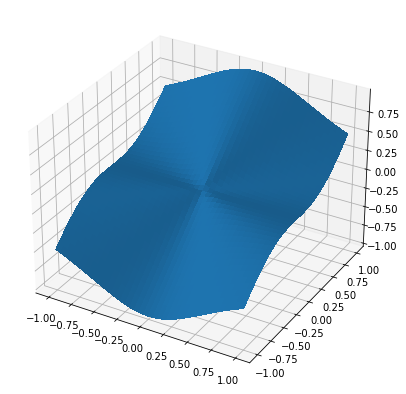

In [45]:
filepath = f'plots/partial_derivatives_but_not_differentiable.png'
plot_mapping(f, a=a, b=b, s=s, filepath=filepath)